In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://holypython.com/python-visualization-tutorial/colors-with-python/


# Entrada dos dados para b=0.0 de Winn et al 2011
winn_b_00 = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=0_ff=0%).txt", delimiter="\n")
winn_b_00_plus = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=-14_ff=0%).txt", delimiter=",")
winn_ff_fac10 = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=-14graus,f_fac=0.10,T_facula=5472K).txt", delimiter="\n")
winn_ff_fac20 = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=-14graus,f_fac=0.20,T_facula=5472K).txt", delimiter="\n")
winn_ff_fac30 = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=-14graus,f_fac=0.30,T_facula=5472K).txt", delimiter="\n")
winn_ff_fac40 = np.genfromtxt("55Cnc_e_Winn+2011_output_transit_depth(trans_lat=-14graus,f_fac=0.40,T_facula=5472K).txt", delimiter="\n")


# Entrada dos dados para b=0.41 de Demory et al 2016
demory_b_041 = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-24_ff=0%).txt", delimiter=",")
demory_b_041_plus = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-27_ff=0%).txt", delimiter=",")
demory_b_041_minus = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-20_ff=0%).txt", delimiter=",")
demory_ff_fac10 = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-20graus,f_fac=0.10,T_facula=5472K).txt", delimiter="\n")
demory_ff_fac20 = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-20graus,f_fac=0.20,T_facula=5472K).txt", delimiter="\n")
demory_ff_fac30 = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-20graus,f_fac=0.30,T_facula=5472K).txt", delimiter="\n")
demory_ff_fac40 = np.genfromtxt("55Cnc_e_Demory+2016_output_transit_depth(trans_lat=-20graus,f_fac=0.40,T_facula=5472K).txt", delimiter="\n")

wavelengths = np.genfromtxt("55Cnc_e_output_wavelengths.txt", delimiter=",")

######### Dados do Hubble ###############

Cond_table5 = np.genfromtxt('55Cnc_e_WFC3.txt', delimiter=",", usecols=(0, 1, 2), skip_header=1)
Cond_table5 = np.transpose(Cond_table5)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


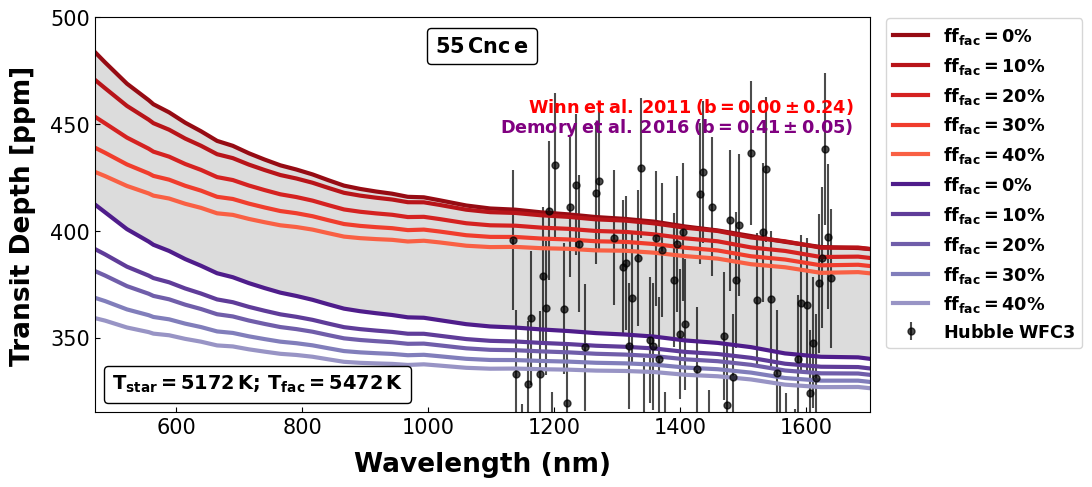

In [46]:
palette = sns.color_palette("Reds_r", 20)
palette1 = sns.color_palette("Purples_r", 20)

fig,ax = plt.subplots(1, 1, sharex=True , figsize=(10, 5))

ax.fill_between(wavelengths, winn_b_00_plus - 10, demory_b_041_minus - 10, color='gainsboro')

plt.errorbar(Cond_table5[0] * 1000, Cond_table5[1], fmt='.', yerr=Cond_table5[2], color='black', ms=10, alpha=0.7,
                label='$\mathrm{\mathbf{Hubble\;WFC3}}$')

ax.plot(wavelengths, winn_b_00_plus - 10, '-', color=palette[1], linewidth=3,
            label='$\mathbf{ff_{fac}=0\%}$')
ax.plot(wavelengths, winn_ff_fac10 - 10, '-', color=palette[3], linewidth=3, label='$\mathbf{ff_{fac}=10\%}$')
ax.plot(wavelengths, winn_ff_fac20 - 10, '-', color=palette[5], linewidth=3, label='$\mathbf{ff_{fac}=20\%}$')
ax.plot(wavelengths, winn_ff_fac30 - 10, '-', color=palette[7], linewidth=3, label='$\mathbf{ff_{fac}=30\%}$')
ax.plot(wavelengths, winn_ff_fac40 - 10, '-', color=palette[9], linewidth=3, label='$\mathbf{ff_{fac}=40\%}$')

#ax.plot(wavelengths, winn_b_00_plus, '-', color=palette[6], linewidth=3,)
#ax.fill_between(wavelengths, winn_b_00,winn_b_00_plus)

ax.plot(wavelengths, demory_b_041_minus - 10, '-', color=palette1[1], linewidth=3,
            label='$\mathbf{ff_{fac}=0\%}$')
ax.plot(wavelengths, demory_ff_fac10 - 10, '-', color=palette1[3], linewidth=3, label='$\mathbf{ff_{fac}=10\%}$')
ax.plot(wavelengths, demory_ff_fac20 - 10, '-', color=palette1[5], linewidth=3, label='$\mathbf{ff_{fac}=20\%}$')
ax.plot(wavelengths, demory_ff_fac30 - 10, '-', color=palette1[7], linewidth=3, label='$\mathbf{ff_{fac}=30\%}$')
ax.plot(wavelengths, demory_ff_fac40 - 10, '-', color=palette1[9], linewidth=3, label='$\mathbf{ff_{fac}=40\%}$')

#ax.plot(wavelengths, demory_b_041_plus, '-', color=palette1[7], linewidth=3)
#ax.plot(wavelengths, demory_b_041_minus, '-', color=palette1[7], linewidth=3)
#ax.fill_between(wavelengths, demory_b_041_minus,demory_b_041_plus, color=palette1[7])


ax.tick_params(axis="x", direction="in", labelsize=15, which='both')
ax.tick_params(axis="y", direction="in", labelsize=15, which='both')
plt.subplots_adjust(top=0.9)
plt.xlim(470, 1700)
plt.ylim(315, 500)
#graph2.set_title('WASP-101$\,$b', fontsize=29, fontweight='bold')
#graph2.set_ylabel('D$_{\mathrm{unnoc}}$ -- D$_{\mathrm{phot}}$ [ppm]', fontsize=25, fontweight="bold") # labelpad é a distância entre o título e o eixo
ax.set_xlabel('Wavelength (nm)', fontsize=19, fontweight="bold", labelpad=10)
ax.set_ylabel('Transit Depth [ppm]', fontsize=19, fontweight="bold", labelpad=10) # labelpad é a distância entre o título e o eixo
#graph2.set_xlabel('Wavelength (nm)', fontsize=22, fontweight="bold", labelpad=10)
ax.yaxis.set_major_locator(MultipleLocator(50))

#graph2.xaxis.set_major_locator(MultipleLocator(30))
#graph2.yaxis.set_minor_locator(MultipleLocator(10))
#graph2.xaxis.set_minor_locator(MultipleLocator(10))
at1 = AnchoredText("$\mathbf{55\,\mathrm{\mathbf{Cnc}}\,\mathrm{\mathbf{e}}}$", prop=dict(size=15),
                    frameon=True, loc='upper center')
at2 = AnchoredText("$\mathbf{T_{star}=5172\,K;\,T_{fac}=5472\,K}$", prop=dict(size=14),
                    frameon=True, loc='lower left')
at3 = AnchoredText("\n\n\n$\mathbf{Winn\;et\;al.\;2011\;(b=0.00\pm0.24)}$", prop=dict(size=12.7, color='red'),
                    frameon=False, loc='upper right')
at4 = AnchoredText("\n\n\n\n$\mathbf{Demory\;et\;al.\;2016\;(b=0.41\pm0.05)}$",
                    frameon=False, loc='upper right', prop=dict(size=12.7, color="purple"))
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist
ax.add_artist(at1)
ax.add_artist(at2)
ax.add_artist(at3)
ax.add_artist(at4)

ax.legend(loc='upper left', prop={'size': 12.7}, title_fontsize=15, bbox_to_anchor=(1.01, 1.02))

plt.savefig("H:\Meu Drive\Arquivos do Doc\Paper - figures\Cnce.impact_parameter.eps", bbox_inches='tight')

In [47]:
# Entrada dos dados para b=0.864 de Pietro-Arranz et al 2018
arranz_b_086 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-57_ff=0%).txt", delimiter="\n")
arranz_b_086_minus = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-48_ff=0%).txt", delimiter=",")
arranz_ff_fac10 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-57graus,f_fac=0.10,T_facula=4640K).txt", delimiter="\n")
arranz_ff_fac20 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-57graus,f_fac=0.20,T_facula=4640K).txt", delimiter="\n")
arranz_ff_fac30 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-57graus,f_fac=0.30,T_facula=4640K).txt", delimiter="\n")
arranz_ff_fac40 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_transit_depth(trans_lat=-57graus,f_fac=0.40,T_facula=4640K).txt", delimiter="\n")

# Entrada dos dados para b=0.91 de Niraula et al 2017
niraula_b_091 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Niraula+2017_output_transit_depth(trans_lat=-65_ff=0%).txt", delimiter=",")
niraula_ff_fac10 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Niraula+2017_output_transit_depth(trans_lat=-65graus,f_fac=0.10,T_facula=4640K).txt", delimiter="\n")
niraula_ff_fac20 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Niraula+2017_output_transit_depth(trans_lat=-65graus,f_fac=0.20,T_facula=4640K).txt", delimiter="\n")
niraula_ff_fac30 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Niraula+2017_output_transit_depth(trans_lat=-65graus,f_fac=0.30,T_facula=4640K).txt", delimiter="\n")
niraula_ff_fac40 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Niraula+2017_output_transit_depth(trans_lat=-65graus,f_fac=0.40,T_facula=4640K).txt", delimiter="\n")

wavelengths_GJ9827 = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_output_wavelengths.txt", delimiter=",")
wavelengths_GJ9827_Arranz = np.genfromtxt("H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\impact parameter\GJ9827d_Arranz+2018_output_wavelengths.txt", delimiter=",")

######### Dados do Hubble ###############

Cond_table5 = np.genfromtxt('H:\Meu Drive\StarsAndExoplanets\Exoplanets\GJ9827d\GJ9827d_WFC3.txt', delimiter=",", usecols=(0, 1, 2), skip_header=1)
Cond_table5 = np.transpose(Cond_table5)

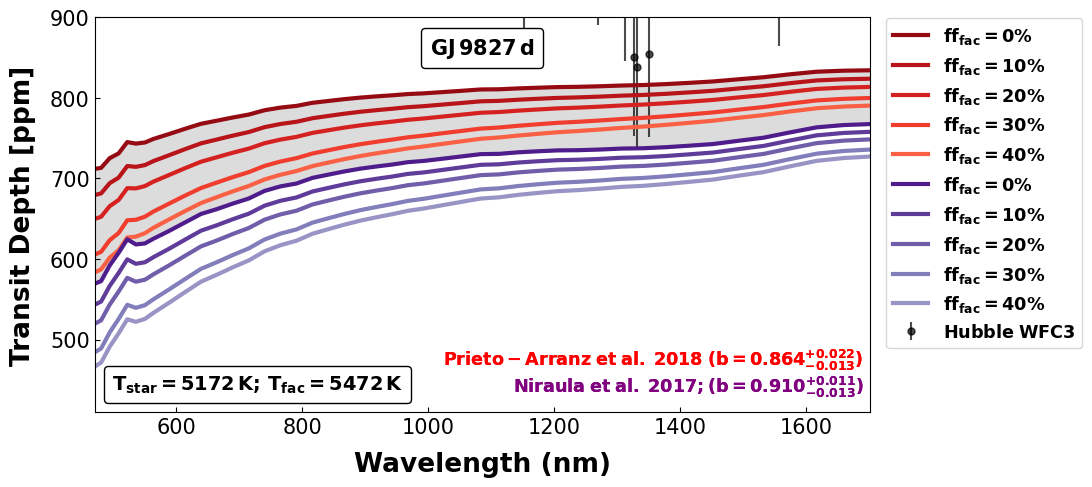

In [48]:
palette = sns.color_palette("Reds_r", 20)
palette1 = sns.color_palette("Purples_r", 20)

fig,ax = plt.subplots(1, 1, sharex=True , figsize=(10, 5))

ax.fill_between(wavelengths_GJ9827, niraula_b_091, arranz_b_086, color='gainsboro')

plt.errorbar(Cond_table5[0] * 1000, Cond_table5[1], fmt='.', yerr=Cond_table5[2], color='black', ms=10, alpha=0.7,
                label='$\mathrm{\mathbf{Hubble\;WFC3}}$')

ax.plot(wavelengths_GJ9827, arranz_b_086, '-', color=palette[1], linewidth=3,
            label='$\mathbf{ff_{fac}=0\%}$')
ax.plot(wavelengths_GJ9827_Arranz, arranz_ff_fac10 , '-', color=palette[3], linewidth=3, label='$\mathbf{ff_{fac}=10\%}$')
ax.plot(wavelengths_GJ9827_Arranz, arranz_ff_fac20, '-', color=palette[5], linewidth=3, label='$\mathbf{ff_{fac}=20\%}$')
ax.plot(wavelengths_GJ9827_Arranz, arranz_ff_fac30, '-', color=palette[7], linewidth=3, label='$\mathbf{ff_{fac}=30\%}$')
ax.plot(wavelengths_GJ9827_Arranz, arranz_ff_fac40, '-', color=palette[9], linewidth=3, label='$\mathbf{ff_{fac}=40\%}$')

#ax.plot(wavelengths, winn_b_00_plus, '-', color=palette[6], linewidth=3,)
#ax.fill_between(wavelengths, winn_b_00,winn_b_00_plus)

ax.plot(wavelengths_GJ9827, niraula_b_091, '-', color=palette1[1], linewidth=3,
            label='$\mathbf{ff_{fac}=0\%}$')
ax.plot(wavelengths_GJ9827_Arranz, niraula_ff_fac10, '-', color=palette1[3], linewidth=3, label='$\mathbf{ff_{fac}=10\%}$')
ax.plot(wavelengths_GJ9827_Arranz, niraula_ff_fac20, '-', color=palette1[5], linewidth=3, label='$\mathbf{ff_{fac}=20\%}$')
ax.plot(wavelengths_GJ9827_Arranz, niraula_ff_fac30, '-', color=palette1[7], linewidth=3, label='$\mathbf{ff_{fac}=30\%}$')
ax.plot(wavelengths_GJ9827_Arranz, niraula_ff_fac40, '-', color=palette1[9], linewidth=3, label='$\mathbf{ff_{fac}=40\%}$')

#ax.plot(wavelengths, demory_b_041_plus, '-', color=palette1[7], linewidth=3)
#ax.plot(wavelengths, demory_b_041_minus, '-', color=palette1[7], linewidth=3)
#ax.fill_between(wavelengths, demory_b_041_minus,demory_b_041_plus, color=palette1[7])


ax.tick_params(axis="x", direction="in", labelsize=15, which='both')
ax.tick_params(axis="y", direction="in", labelsize=15, which='both')
plt.subplots_adjust(top=0.9)
plt.xlim(470, 1700)
plt.ylim(410, 900)
#graph2.set_title('WASP-101$\,$b', fontsize=29, fontweight='bold')
#graph2.set_ylabel('D$_{\mathrm{unnoc}}$ -- D$_{\mathrm{phot}}$ [ppm]', fontsize=25, fontweight="bold") # labelpad é a distância entre o título e o eixo
ax.set_xlabel('Wavelength (nm)', fontsize=19, fontweight="bold", labelpad=10)
ax.set_ylabel('Transit Depth [ppm]', fontsize=19, fontweight="bold", labelpad=10) # labelpad é a distância entre o título e o eixo
#graph2.set_xlabel('Wavelength (nm)', fontsize=22, fontweight="bold", labelpad=10)
#ax.yaxis.set_major_locator(MultipleLocator(50))

#graph2.xaxis.set_major_locator(MultipleLocator(30))
#graph2.yaxis.set_minor_locator(MultipleLocator(10))
#graph2.xaxis.set_minor_locator(MultipleLocator(10))
at1 = AnchoredText("$\mathbf{GJ\,\mathrm{\mathbf{9827}}\,\mathrm{\mathbf{d}}}$", prop=dict(size=15),
                    frameon=True, loc='upper center')
at2 = AnchoredText("$\mathbf{T_{star}=5172\,K;\,T_{fac}=5472\,K}$", prop=dict(size=14),
                    frameon=True, loc='lower left')
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist
ax.add_artist(at1)
ax.add_artist(at2)

text1 = plt.text(0.45, 0.12, "$\mathbf{Prieto-Arranz\;et\;al.\;2018\;(b=0.864^{+0.022}_{-0.013})}$", size=12.7, color='red', transform=ax.transAxes)
text2 = plt.text(0.54, 0.05, "$\mathbf{Niraula\;et\;al.\;2017;(b=0.910^{+0.011}_{-0.013})}$", size=12.7, color='purple', transform=ax.transAxes)
ax.add_artist(text1)
ax.add_artist(text2)

ax.legend(loc='upper left', prop={'size': 12.7}, title_fontsize=15, bbox_to_anchor=(1.01, 1.02))

plt.show()